In [ ]:
import pandas as pd

In [ ]:
crime_data = pd.read_csv(r"E:\google download\archive\crime_dataset_india.csv")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
crime_data.shape

(40160, 14)

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [ ]:
crime_data.columns


Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [ ]:
crime_data.columns = crime_data.columns.str.strip()


In [ ]:
crime_data["Date Reported"] = pd.to_datetime(
    crime_data["Date Reported"], dayfirst=True, errors="coerce"
)

crime_data["Date Case Closed"] = pd.to_datetime(
    crime_data["Date Case Closed"], dayfirst=True, errors="coerce"
)


In [ ]:
crime_data.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [ ]:
crime_data.isnull().sum().sum()

np.int64(25888)

In [ ]:
crime_data[crime_data.isnull().any(axis=1)]

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-01-02 00:00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2,2020-01-01 19:00:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,3,2020-01-02 05:00:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
7,8,2020-01-02 10:00:00,01-01-2020 07:00,02-01-2020 06:33,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,NaT
8,9,2020-01-04 03:00:00,01-01-2020 08:00,02-01-2020 06:34,Mumbai,338,EXTORTION,41,X,Blunt Object,Other Crime,1,No,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40154,40155,2024-08-01 11:00:00,07-31-2024 02:00,31-07-2024 12:59,Chennai,532,COUNTERFEITING,50,F,Explosives,Other Crime,2,No,NaT
40155,40156,2024-08-01 16:00:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT
40156,40157,2024-07-31 14:00:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00
40157,40158,2024-08-02 03:00:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT


In [ ]:
crime_data.shape[0]


40160

In [ ]:
crime_data["Crime Description"].value_counts()


Crime Description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
ASSAULT                1915
TRAFFIC VIOLATION      1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64

In [ ]:
crime_data["Crime Domain"].value_counts()


Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64

In [ ]:
crime_data["City"].value_counts()


City
Delhi            5400
Mumbai           4415
Bangalore        3588
Hyderabad        2881
Kolkata          2518
Chennai          2493
Pune             2212
Ahmedabad        1817
Jaipur           1479
Lucknow          1456
Kanpur           1112
Surat            1111
Nagpur           1053
Agra              764
Ludhiana          761
Visakhapatnam     728
Thane             706
Ghaziabad         704
Indore            699
Patna             695
Bhopal            690
Meerut            395
Srinagar          371
Nashik            366
Vasai             362
Varanasi          355
Kalyan            355
Faridabad         354
Rajkot            320
Name: count, dtype: int64

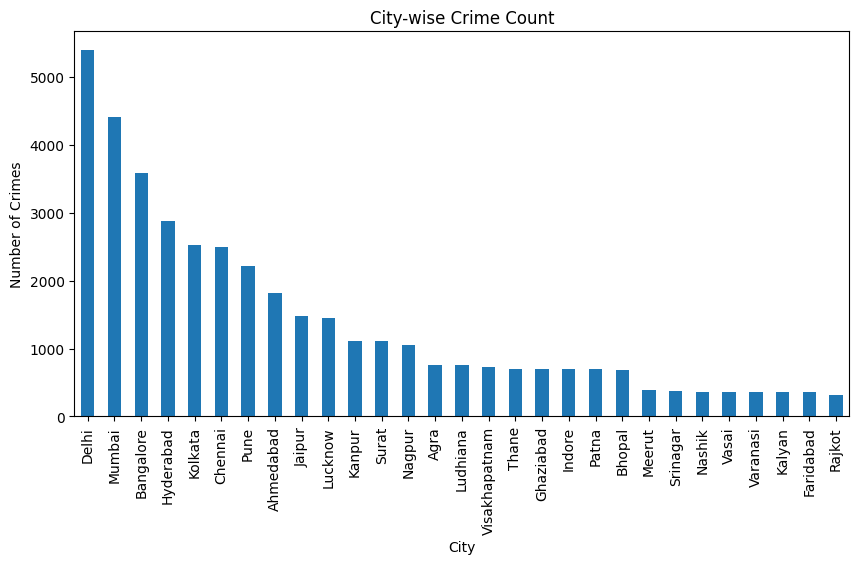

In [ ]:
crime_data["City"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("City-wise Crime Count")
plt.xlabel("City")
plt.ylabel("Number of Crimes")
plt.show()


In [ ]:
crime_data["Year"] = crime_data["Date Reported"].dt.year
crime_data.groupby("Year")["Report Number"].count()


Year
2020    8747
2021    8766
2022    8759
2023    8761
2024    5127
Name: Report Number, dtype: int64

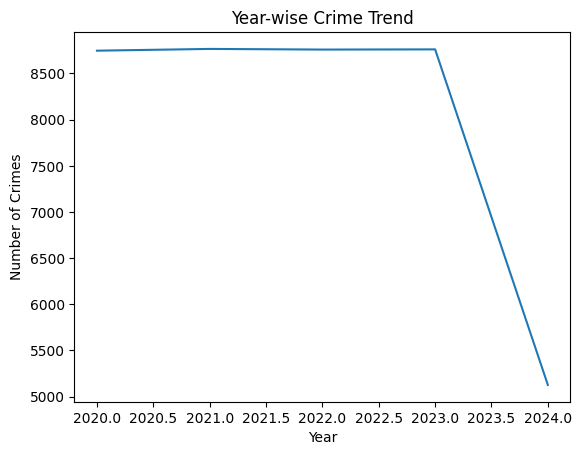

In [ ]:
crime_data.groupby("Year")["Report Number"].count().plot(kind="line")
plt.title("Year-wise Crime Trend")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


In [ ]:
crime_data["Victim Gender"].value_counts()


Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64

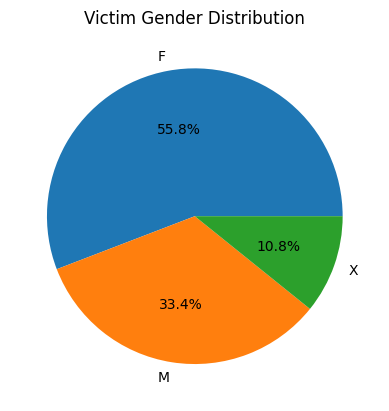

In [ ]:
crime_data["Victim Gender"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", ylabel=""
)
plt.title("Victim Gender Distribution")
plt.show()


In [ ]:
crime_data.groupby("Crime Description")["Victim Age"].mean()


Crime Description
ARSON                  44.407075
ASSAULT                43.555091
BURGLARY               44.069192
COUNTERFEITING         44.801176
CYBERCRIME             44.013165
DOMESTIC VIOLENCE      44.589545
DRUG OFFENSE           44.102646
EXTORTION              45.698345
FIREARM OFFENSE        44.130502
FRAUD                  44.246310
HOMICIDE               44.374542
IDENTITY THEFT         45.039625
ILLEGAL POSSESSION     45.361478
KIDNAPPING             44.029688
PUBLIC INTOXICATION    44.265167
ROBBERY                44.405083
SEXUAL ASSAULT         44.199791
SHOPLIFTING            44.947283
TRAFFIC VIOLATION      43.865274
VANDALISM              45.597975
VEHICLE - STOLEN       44.656821
Name: Victim Age, dtype: float64

In [ ]:
crime_data["Weapon Used"].value_counts()


Weapon Used
Knife           5835
Explosives      5751
Blunt Object    5737
Poison          5728
Other           5676
Firearm         5643
Name: count, dtype: int64

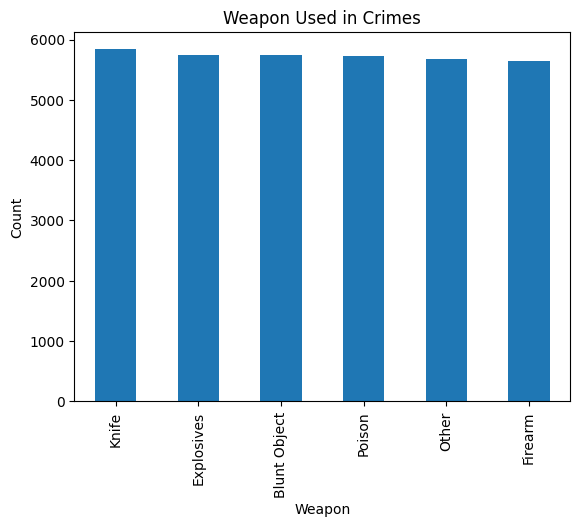

In [ ]:
crime_data["Weapon Used"].value_counts().plot(kind="bar")
plt.title("Weapon Used in Crimes")
plt.xlabel("Weapon")
plt.ylabel("Count")
plt.show()


In [ ]:
crime_data["Police Deployed"].mean()


np.float64(10.00625)

In [ ]:
crime_data.groupby("Crime Description")["Police Deployed"].mean()


Crime Description
ARSON                   9.872756
ASSAULT                10.015666
BURGLARY               10.085859
COUNTERFEITING         10.113308
CYBERCRIME             10.006846
DOMESTIC VIOLENCE      10.062112
DRUG OFFENSE            9.837566
EXTORTION              10.058729
FIREARM OFFENSE        10.056965
FRAUD                  10.234606
HOMICIDE                9.823992
IDENTITY THEFT         10.066736
ILLEGAL POSSESSION     10.068074
KIDNAPPING             10.016667
PUBLIC INTOXICATION     9.887029
ROBBERY                10.036826
SEXUAL ASSAULT         10.002087
SHOPLIFTING             9.855836
TRAFFIC VIOLATION      10.044386
VANDALISM              10.184810
VEHICLE - STOLEN        9.773899
Name: Police Deployed, dtype: float64

In [ ]:
crime_data["Case Closed"].value_counts()


Case Closed
No     20098
Yes    20062
Name: count, dtype: int64

In [ ]:
crime_data["Case Closed"].value_counts(normalize=True) * 100


Case Closed
No     50.044821
Yes    49.955179
Name: proportion, dtype: float64

In [ ]:
crime_data["Case_Closure_Days"] = (
    crime_data["Date Case Closed"] - crime_data["Date Reported"]
).dt.days


In [ ]:
crime_data.loc[
    crime_data["Case Closed"] == "Yes",
    "Case_Closure_Days"
].mean()


np.float64(88.05782075565746)

In [ ]:
crime_data[crime_data["Case Closed"] == "Yes"] \
    .groupby("City")["Case_Closure_Days"].mean() \
    .sort_values()


City
Varanasi          72.612717
Faridabad         74.149733
Kanpur            74.607706
Nagpur            79.139098
Surat             79.705986
Kalyan            80.084848
Agra              81.109043
Ghaziabad         81.308824
Pune              81.992740
Jaipur            83.733775
Rajkot            85.006061
Indore            85.537356
Ahmedabad         86.355221
Bangalore         87.175668
Patna             87.280802
Lucknow           88.177181
Kolkata           88.464088
Bhopal            88.833333
Thane             89.168865
Delhi             90.569539
Hyderabad         90.662783
Visakhapatnam     91.008086
Srinagar          92.192771
Nashik            93.462857
Mumbai            93.846433
Chennai           93.910628
Meerut            95.240642
Ludhiana          99.456576
Vasai            105.482558
Name: Case_Closure_Days, dtype: float64

In [ ]:
pd.crosstab(crime_data["City"], crime_data["Crime Domain"])


Crime Domain,Fire Accident,Other Crime,Traffic Fatality,Violent Crime
City,,,,
Agra,83,420,33,228
Ahmedabad,168,1009,81,559
Bangalore,318,2096,166,1008
Bhopal,66,396,31,197
Chennai,260,1432,110,691
Delhi,518,3125,198,1559
Faridabad,36,184,18,116
Ghaziabad,59,397,42,206
Hyderabad,290,1601,135,855


In [ ]:
pd.crosstab(crime_data["Crime Description"], crime_data["Case Closed"])


Case Closed,No,Yes
Crime Description,,
ARSON,964,930
ASSAULT,963,952
BURGLARY,1026,954
COUNTERFEITING,931,940
CYBERCRIME,954,945
DOMESTIC VIOLENCE,947,985
DRUG OFFENSE,958,932
EXTORTION,922,951
FIREARM OFFENSE,972,959


In [ ]:
crime_data[crime_data["Case Closed"] == "Yes"] \
    [["Police Deployed", "Case_Closure_Days"]].corr()


,Police Deployed,Case_Closure_Days
Police Deployed,1.000000,-0.004788
Case_Closure_Days,-0.004788,1.000000


In [ ]:
crime_data.to_csv("cleaned_crime_data.csv", index=False)


In [ ]:
import os
os.getcwd()


'C:\\Users\\anupk'

In [ ]:
crime_data["Date Reported"] = pd.to_datetime(
    crime_data["Date Reported"],
    dayfirst=True,
    errors="coerce"
)

crime_data["Date Case Closed"] = pd.to_datetime(
    crime_data["Date Case Closed"],
    dayfirst=True,
    errors="coerce"
)
crime_data["Date of Occurrence"] = pd.to_datetime(
    crime_data["Date of Occurrence"],
    dayfirst=True,
    errors="coerce"
)

C:\Users\anupk\AppData\Local\Temp\ipykernel_12772\1696633465.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  crime_data["Date Case Closed"] = pd.to_datetime(


In [ ]:
crime_data["Date Reported"] = crime_data["Date Reported"].dt.strftime("%Y-%m-%d")
crime_data["Date Case Closed"] = crime_data["Date Case Closed"].dt.strftime("%Y-%m-%d")
crime_data["Date of Occurrence"] = crime_data["Date of Occurrence"].dt.strftime("%Y-%m-%d")

In [ ]:
crime_data.to_csv("cleaned_crime_data.csv", index=False)


In [ ]:
os.getcwd()

'C:\\Users\\anupk'